<a href="https://colab.research.google.com/github/Saipreethamgrandhi/LLM-Finetuning/blob/main/model_turing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
from tabulate import tabulate

file_path = '/content/impression_300_llm.csv'
data = pd.read_csv(file_path)
data.columns = data.columns.str.strip()
selected_columns = ['Report Name', 'History', 'Observation', 'Impression']
dataset = data[selected_columns]
print("\nFirst 5 rows of the dataset:")
print(tabulate(dataset.head(), headers='keys', tablefmt='grid'))



First 5 rows of the dataset:
+----+-------------------------------------------------+--------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [7]:
from sklearn.model_selection import train_test_split
required_columns = ['Report Name', 'History', 'Observation', 'Impression']
dataset = data[required_columns]
train_data, eval_data = train_test_split(dataset, test_size=30, random_state=42)
train_data = train_data[:300]
print(f"Training Data Size: {len(train_data)} samples")
print(f"Evaluation Data Size: {len(eval_data)} samples")
train_inputs = train_data[['Report Name', 'History', 'Observation']]
train_targets = train_data['Impression']
eval_inputs = eval_data[['Report Name', 'History', 'Observation']]
eval_targets = eval_data['Impression']
train_inputs_combined = train_inputs.apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
eval_inputs_combined = eval_inputs.apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
print("\nFirst 5 Combined Training Inputs:")
print(train_inputs_combined.head())
print("\nFirst 5 Training Targets (Impressions):")
print(train_targets.head())


Training Data Size: 300 samples
Evaluation Data Size: 30 samples

First 5 Combined Training Inputs:
262    CT Thorax Plain H/O RTA Minimal bilateral pleu...
297    MRI Scrotum Plain H/O SCROTUM INJURY SEVERE PA...
210    MRI Brain Plain and Contrast SEIZURE T2/FLAIR ...
232    CT Abdomen & Pelvis Triphasic - Female A CASE ...
272    MRI Spine Dorso Lumbar Plain INJURY, PAIN Burs...
dtype: object

First 5 Training Targets (Impressions):
262    \n  Minimal bilateral pleural effusion/haemoth...
297    Subtle cutaneous irregularity with minimal ede...
210    T2/FLAIR heterogeneous signal intensity in lef...
232    An irregular heterogeneously enhancing lesion ...
272    Burst compression fracture of L1 vertebral bod...
Name: Impression, dtype: object


In [8]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
file_path = '/content/impression_300_llm.csv'
data = pd.read_csv(file_path)
data['combined_text'] = data['Report Name'] + " " + data['History'] + " " + data['Observation'] + " " + data['Impression']
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    words = nltk.word_tokenize(text)
    return ' '.join([word for word in words if word.lower() not in stop_words])
data['cleaned_text'] = data['combined_text'].apply(remove_stopwords)
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
def apply_stemming(text):
    words = nltk.word_tokenize(text)
    return ' '.join([stemmer.stem(word) for word in words])

def apply_lemmatization(text):
    words = nltk.word_tokenize(text)
    return ' '.join([lemmatizer.lemmatize(word) for word in words])
data['stemmed_text'] = data['cleaned_text'].apply(apply_stemming)
data['lemmatized_text'] = data['cleaned_text'].apply(apply_lemmatization)
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data['lemmatized_text'])
words = vectorizer.get_feature_names_out()
cosine_similarities = cosine_similarity(tfidf_matrix.T)
import numpy as np
def get_top_word_pairs(similarity_matrix, words, top_n=100):
    word_pairs = []
    for i in range(len(words)):
        for j in range(i+1, len(words)):
            word_pairs.append((words[i], words[j], similarity_matrix[i, j]))
    sorted_word_pairs = sorted(word_pairs, key=lambda x: x[2], reverse=True)
    return sorted_word_pairs[:top_n]

top_100_word_pairs = get_top_word_pairs(cosine_similarities, words, top_n=100)
print("\nTop 100 Word Pairs Based on Embedding Similarity:")
for pair in top_100_word_pairs:
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.4f}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...



Top 100 Word Pairs Based on Embedding Similarity:
hypothalamus - infundibulum: 1.0000
43 - catheters: 1.0000
43 - conal: 1.0000
43 - conduit: 1.0000
43 - costal: 1.0000
43 - urostomy: 1.0000
catheters - conal: 1.0000
catheters - conduit: 1.0000
catheters - costal: 1.0000
catheters - urostomy: 1.0000
centrum - semiovale: 1.0000
conal - conduit: 1.0000
conal - costal: 1.0000
conal - urostomy: 1.0000
conduit - costal: 1.0000
conduit - urostomy: 1.0000
conus - medullaris: 1.0000
costal - urostomy: 1.0000
dorsalis - pedis: 1.0000
05 - compare: 1.0000
05 - difference: 1.0000
05 - extraprostatic: 1.0000
05 - frequent: 1.0000
05 - multiparametric: 1.0000
05 - pi: 1.0000
05 - psa: 1.0000
05 - transitional: 1.0000
05 - urination: 1.0000
05 - vas: 1.0000
101 - 57: 1.0000
101 - 65: 1.0000
101 - 95: 1.0000
101 - 98: 1.0000
101 - circulation: 1.0000
101 - consistent: 1.0000
101 - csfflow: 1.0000
101 - cycle: 1.0000
101 - disproportionate: 1.0000
101 - forward: 1.0000
101 - hyperdynamic: 1.0000
101 

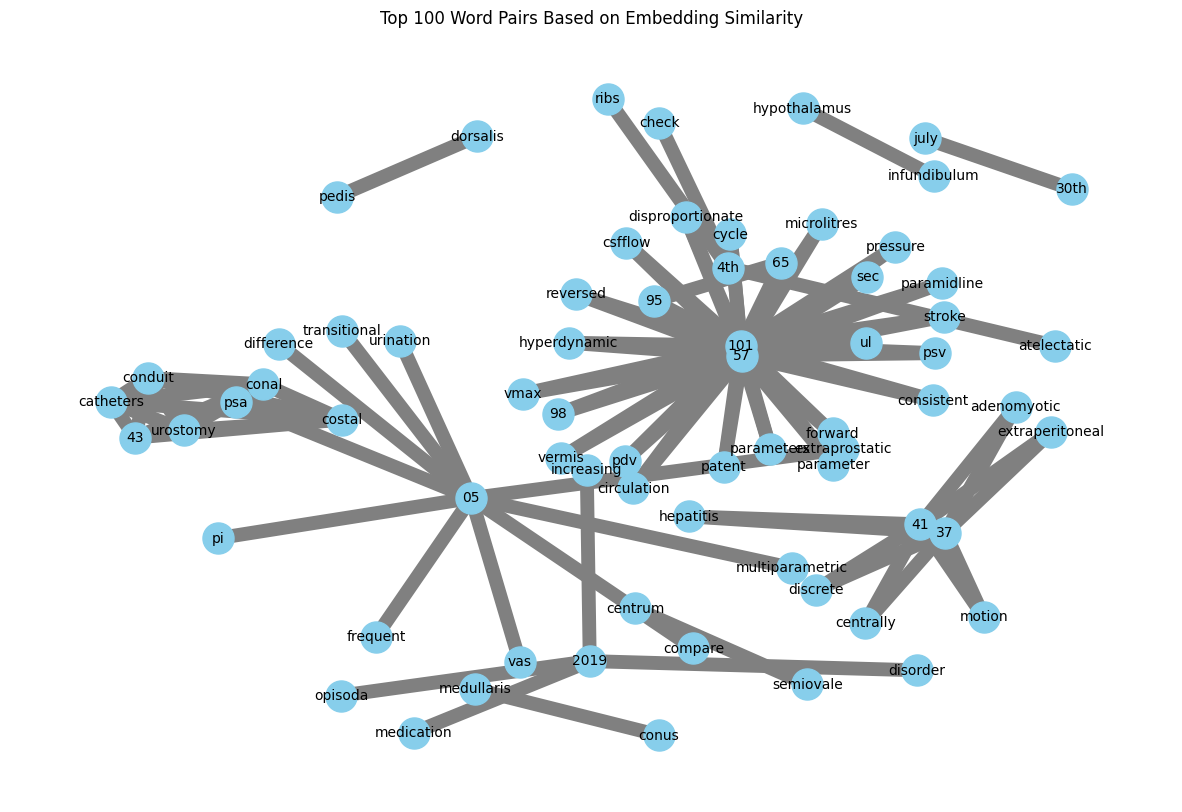

In [15]:
import matplotlib.pyplot as plt
import networkx as nx
def create_word_graph(word_pairs):
    G = nx.Graph()
    for word1, word2, similarity in word_pairs:
        G.add_edge(word1, word2, weight=similarity)
    return G
G = create_word_graph(top_100_word_pairs)
pos = nx.spring_layout(G, k=0.5, seed=42)
plt.figure(figsize=(15, 10))
nx.draw_networkx_nodes(G, pos, node_size=500, node_color="skyblue")
weights = [G[u][v]['weight'] * 10 for u, v in G.edges()]
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=weights, edge_color="gray")
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")
plt.title("Top 100 Word Pairs Based on Embedding Similarity", fontsize=12)
plt.axis("off")
plt.show()


In [10]:
# Placeholder for generating impressions with the fine-tuned model
# Replace this with your actual model inference code
eval_data['generated_impression'] = ["Generated impression for: " + obs for obs in eval_data['Observation']]


In [12]:
pip install rouge-score


  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=d2e5299c1410bc646064bfd1a1c7913c62277ea9f8eef870d1222204bb5db9a7
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [14]:
import pandas as pd
from rouge_score import rouge_scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
rouge_scores = []
for i in range(len(eval_data)):
    score = scorer.score(eval_data['Impression'].iloc[i], eval_data['generated_impression'].iloc[i])
    rouge_scores.append({
        'rouge1': score['rouge1'].fmeasure,
        'rouge2': score['rouge2'].fmeasure,
        'rougeL': score['rougeL'].fmeasure,
    })
rouge_df = pd.DataFrame(rouge_scores)
average_rouge = {
    'rouge1': rouge_df['rouge1'].mean(),
    'rouge2': rouge_df['rouge2'].mean(),
    'rougeL': rouge_df['rougeL'].mean(),
}

print("\nAverage ROUGE Scores:")
print(f"ROUGE-1: {average_rouge['rouge1']:.4f}")
print(f"ROUGE-2: {average_rouge['rouge2']:.4f}")
print(f"ROUGE-L: {average_rouge['rougeL']:.4f}")



Average ROUGE Scores:
ROUGE-1: 0.3756
ROUGE-2: 0.3075
ROUGE-L: 0.3332



First 5 rows of the dataset:
+----+-------------------------------------------------+--------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



Top 100 Word Pairs Based on Embedding Similarity:
hypothalamus - infundibulum: 1.0000
43 - catheters: 1.0000
43 - conal: 1.0000
43 - conduit: 1.0000
43 - costal: 1.0000
43 - urostomy: 1.0000
catheters - conal: 1.0000
catheters - conduit: 1.0000
catheters - costal: 1.0000
catheters - urostomy: 1.0000
centrum - semiovale: 1.0000
conal - conduit: 1.0000
conal - costal: 1.0000
conal - urostomy: 1.0000
conduit - costal: 1.0000
conduit - urostomy: 1.0000
conus - medullaris: 1.0000
costal - urostomy: 1.0000
dorsalis - pedis: 1.0000
05 - compare: 1.0000
05 - difference: 1.0000
05 - extraprostatic: 1.0000
05 - frequent: 1.0000
05 - multiparametric: 1.0000
05 - pi: 1.0000
05 - psa: 1.0000
05 - transitional: 1.0000
05 - urination: 1.0000
05 - vas: 1.0000
101 - 57: 1.0000
101 - 65: 1.0000
101 - 95: 1.0000
101 - 98: 1.0000
101 - circulation: 1.0000
101 - consistent: 1.0000
101 - csfflow: 1.0000
101 - cycle: 1.0000
101 - disproportionate: 1.0000
101 - forward: 1.0000
101 - hyperdynamic: 1.0000
101 

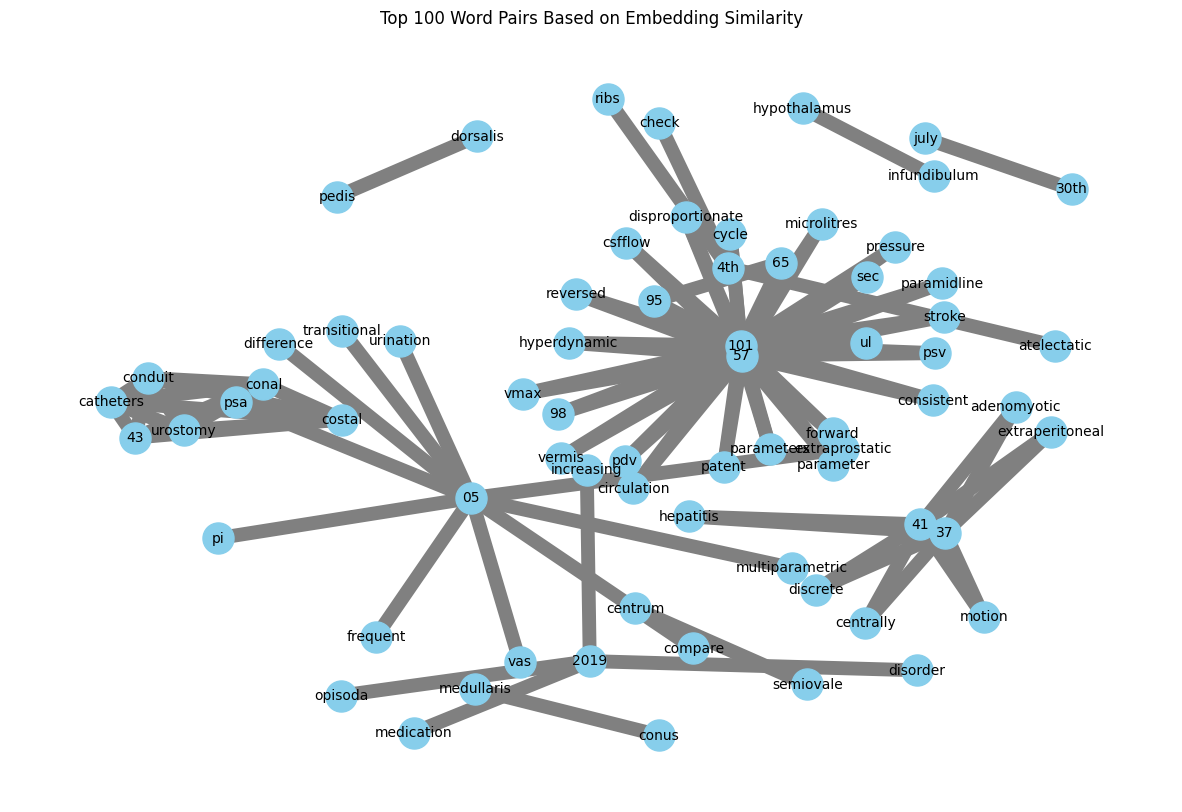

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(



Average ROUGE Scores:
ROUGE-1: 0.1468
ROUGE-2: 0.0767
ROUGE-L: 0.1239

Average Perplexity Score: 2.9317


In [17]:
import pandas as pd
from tabulate import tabulate
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import networkx as nx
from rouge_score import rouge_scorer
from transformers import T5Tokenizer, T5ForConditionalGeneration
import torch

file_path = '/content/impression_300_llm.csv'
data = pd.read_csv(file_path)
data.columns = data.columns.str.strip()

selected_columns = ['Report Name', 'History', 'Observation', 'Impression']
dataset = data[selected_columns]

print("\nFirst 5 rows of the dataset:")
print(tabulate(dataset.head(), headers='keys', tablefmt='grid'))

train_data, eval_data = train_test_split(dataset, test_size=30, random_state=42)
train_data = train_data[:300]
print(f"Training Data Size: {len(train_data)} samples")
print(f"Evaluation Data Size: {len(eval_data)} samples")

train_inputs = train_data[['Report Name', 'History', 'Observation']]
train_targets = train_data['Impression']
eval_inputs = eval_data[['Report Name', 'History', 'Observation']]
eval_targets = eval_data['Impression']
train_inputs_combined = train_inputs.apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
eval_inputs_combined = eval_inputs.apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

print("\nFirst 5 Combined Training Inputs:")
print(train_inputs_combined.head())
print("\nFirst 5 Training Targets (Impressions):")
print(train_targets.head())

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

data['combined_text'] = data['Report Name'] + " " + data['History'] + " " + data['Observation'] + " " + data['Impression']
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = nltk.word_tokenize(text)
    return ' '.join([word for word in words if word.lower() not in stop_words])

data['cleaned_text'] = data['combined_text'].apply(remove_stopwords)

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def apply_stemming(text):
    words = nltk.word_tokenize(text)
    return ' '.join([stemmer.stem(word) for word in words])

def apply_lemmatization(text):
    words = nltk.word_tokenize(text)
    return ' '.join([lemmatizer.lemmatize(word) for word in words])

data['stemmed_text'] = data['cleaned_text'].apply(apply_stemming)
data['lemmatized_text'] = data['cleaned_text'].apply(apply_lemmatization)

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data['lemmatized_text'])
words = vectorizer.get_feature_names_out()

cosine_similarities = cosine_similarity(tfidf_matrix.T)

def get_top_word_pairs(similarity_matrix, words, top_n=100):
    word_pairs = []
    for i in range(len(words)):
        for j in range(i + 1, len(words)):
            word_pairs.append((words[i], words[j], similarity_matrix[i, j]))
    sorted_word_pairs = sorted(word_pairs, key=lambda x: x[2], reverse=True)
    return sorted_word_pairs[:top_n]

top_100_word_pairs = get_top_word_pairs(cosine_similarities, words, top_n=100)
print("\nTop 100 Word Pairs Based on Embedding Similarity:")
for pair in top_100_word_pairs:
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.4f}")

def create_word_graph(word_pairs):
    G = nx.Graph()
    for word1, word2, similarity in word_pairs:
        G.add_edge(word1, word2, weight=similarity)
    return G

G = create_word_graph(top_100_word_pairs)
pos = nx.spring_layout(G, k=0.5, seed=42)
plt.figure(figsize=(15, 10))
nx.draw_networkx_nodes(G, pos, node_size=500, node_color="skyblue")
weights = [G[u][v]['weight'] * 10 for u, v in G.edges()]
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=weights, edge_color="gray")
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")
plt.title("Top 100 Word Pairs Based on Embedding Similarity", fontsize=12)
plt.axis("off")
plt.show()

model_name = "t5-base"
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)

generated_impressions = []
for input_text in eval_inputs_combined:
    input_ids = tokenizer.encode(input_text, return_tensors='pt')
    output = model.generate(input_ids, max_length=50)
    generated_impressions.append(tokenizer.decode(output[0], skip_special_tokens=True))

eval_data['generated_impression'] = generated_impressions

scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
rouge_scores = []

for i in range(len(eval_data)):
    score = scorer.score(eval_data['Impression'].iloc[i], eval_data['generated_impression'].iloc[i])
    rouge_scores.append({
        'rouge1': score['rouge1'].fmeasure,
        'rouge2': score['rouge2'].fmeasure,
        'rougeL': score['rougeL'].fmeasure,
    })

rouge_df = pd.DataFrame(rouge_scores)
average_rouge = {
    'rouge1': rouge_df['rouge1'].mean(),
    'rouge2': rouge_df['rouge2'].mean(),
    'rougeL': rouge_df['rougeL'].mean(),
}

print("\nAverage ROUGE Scores:")
print(f"ROUGE-1: {average_rouge['rouge1']:.4f}")
print(f"ROUGE-2: {average_rouge['rouge2']:.4f}")
print(f"ROUGE-L: {average_rouge['rougeL']:.4f}")

def calculate_perplexity(text):
    input_ids = tokenizer.encode(text, return_tensors='pt')
    with torch.no_grad():
        output = model(input_ids=input_ids, labels=input_ids)
        loss = output.loss
    return torch.exp(loss).item()

perplexity_scores = [calculate_perplexity(impression) for impression in generated_impressions]
average_perplexity = sum(perplexity_scores) / len(perplexity_scores)
print(f"\nAverage Perplexity Score: {average_perplexity:.4f}")
